In [33]:
# Mengakses link ke google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [34]:
# Mendefinisikan data path
path_data = '/content/gdrive/My Drive/Summer Class/meet 10/'

In [35]:
# Membaca directory
import os
os.listdir(path_data)

In [36]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [37]:
df = pd.read_csv('airquality.csv', sep=",", decimal='.' )
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### Gunakan data airquality.csv untuk Case 1

Apakah terdeteksi outlier pada kolom Solar.R dan Wind?

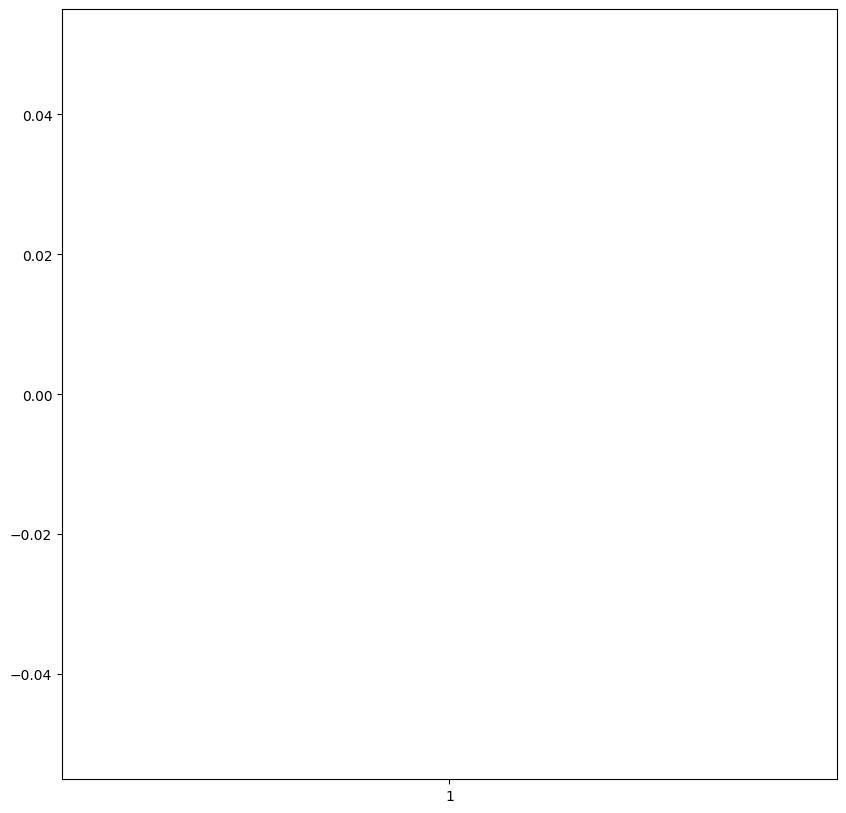

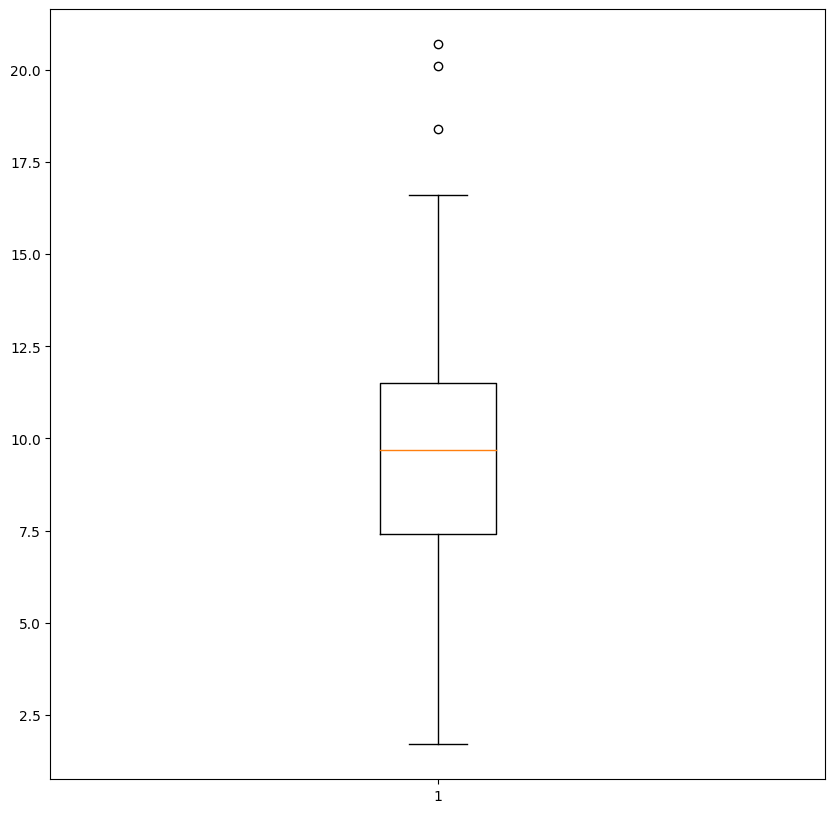

In [38]:
plt.figure(figsize=(10,10))
plt.boxplot(df['Solar.R'])
plt.show()
plt.figure(figsize=(10,10))
plt.boxplot(df['Wind'])
plt.show()

In [39]:
def OutlierChecker(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    if (len(outliers) == 0):
        return 'Tidak terdapat outliers'
    else :
        print("Terdapat outliers pada data tersebut.\nOutliersnya adalah sbb:")
        return outliers

print("==== Kolom Solar R ====")
sampleSolar = df['Solar.R']
OutlierChecker(sampleSolar)

==== Kolom Solar R ====


'Tidak terdapat outliers'

In [40]:
print("==== Kolom Wind ====")
sampleWind = df['Wind']
OutlierChecker(sampleWind)

==== Kolom Wind ====
Terdapat outliers pada data tersebut.
Outliersnya adalah sbb:


[18.4, 20.1, 20.7]

Data mana yang merupakan outlier pada kolom Ozone dan Solar.R?

In [41]:
print("Data yang merupakan outlier pada Solar.R adalah")
OutlierChecker(sampleSolar)

Data yang merupakan outlier pada Solar.R adalah


'Tidak terdapat outliers'

In [42]:
print("Data yang merupakan outlier pada Ozone adalah")
sampleOzone = df['Ozone']
OutlierChecker(sampleOzone)

Data yang merupakan outlier pada Ozone adalah


'Tidak terdapat outliers'

### Gunakan data winequalityN.csv untuk Case 2
Informasi apa yang dapat kamu berikan tentang data tersebut sebelum dilakukan analisis?

In [43]:
df2 = pd.read_csv('winequalityN.csv', sep=',', decimal='.' )
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


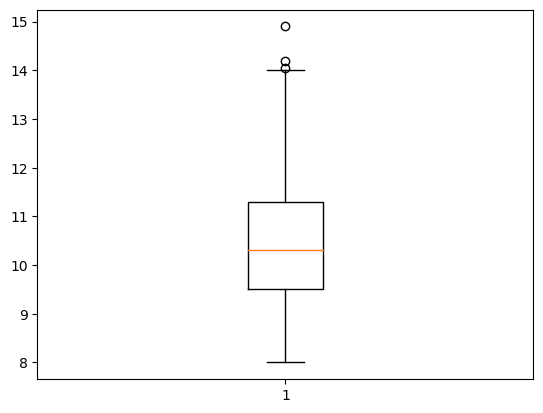

In [44]:
plt.figure()
plt.boxplot(df2['alcohol'])
plt.show()

#### Deteksi Outlier Alcohol

Apakah ada outlier pada kolom alcohol?

In [45]:
# mengecek outliers dengan fungsi yang telah dibuat sebelumnya
sampleAlcohol = df2['alcohol']
OutlierChecker(sampleAlcohol)

Terdapat outliers pada data tersebut.
Outliersnya adalah sbb:


[14.05, 14.2, 14.9]

Jika terdeteksi outlier, atasi outlier tersebut ya! Tunjukkan nilai mana saja yang dianggap sebagai outlier!

In [46]:
# menunjukkan nilai yang dianggap outlier
outlierAlcohol = OutlierChecker(sampleAlcohol)
print(outlierAlcohol)

Terdapat outliers pada data tersebut.
Outliersnya adalah sbb:
[14.05, 14.2, 14.9]


In [47]:
def OutlierHandler(outlier,sample):
      tr = []
      for j in outlier:
            f = j in sample
            if f is False:
                  tr.append(j)
      print("Mean data setelah penghapusan: ",statistics.mean(tr))
      print("Median data setelah penghapusan: ",statistics.median(tr))
      print(tr)
      return tr

afterdel = OutlierHandler(outlierAlcohol,sampleAlcohol)

Mean data setelah penghapusan:  14.383333333333333
Median data setelah penghapusan:  14.2
[14.05, 14.2, 14.9]


Bagaimana setelah outlier diatasi?

Text(0.5, 0, 'Alcohol')

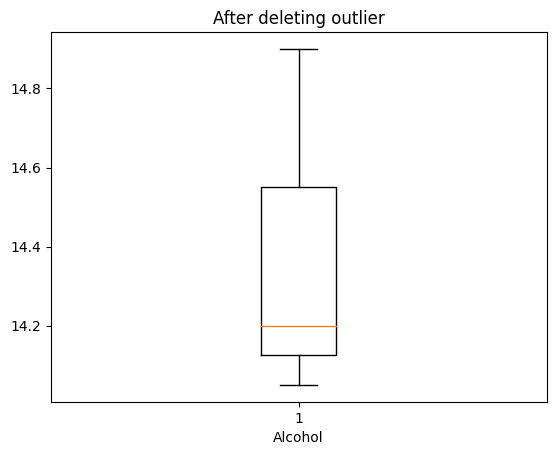

In [48]:
plt.boxplot(afterdel, vert=True)
plt.title("After deleting outlier")
plt.xlabel('Alcohol')

### Deteksi Outlier Total Sulfur

Coba deteksi outlier pada kolom total sulfur dioxide!

In [54]:
sampleSulfur = df2['total sulfur dioxide']
countOutliers = OutlierChecker(sampleSulfur)
print(countOutliers)

Terdapat outliers pada data tersebut.
Outliersnya adalah sbb:
[278.0, 282.0, 289.0, 294.0, 303.0, 307.5, 313.0, 344.0, 366.5, 440.0]


Ada berapa outlier yang kamu temui?

In [55]:
print(f'Jumlah outliers pada total sulfur adalah {len(countOutliers)} ')

Jumlah outliers pada total sulfur adalah 10 


Tunjukkan hasil handle outliermu!

In [56]:
afterdel = OutlierHandler(countOutliers,sampleSulfur)

Mean data setelah penghapusan:  337.0
Median data setelah penghapusan:  337.0
[307.5, 366.5]


Text(0.5, 0, 'Total Sulfur')

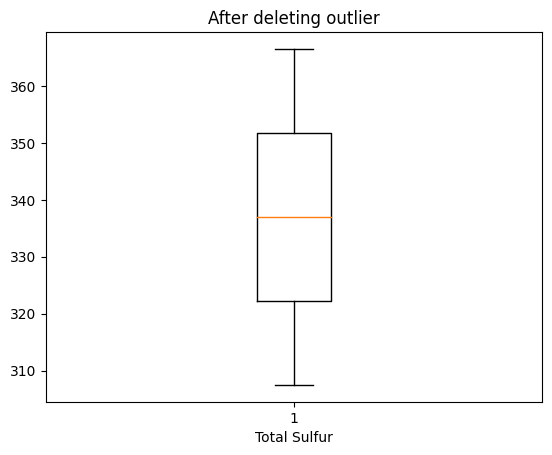

In [57]:
plt.boxplot(afterdel, vert=True)
plt.title("After deleting outlier")
plt.xlabel('Total Sulfur')

### Deteksi Outlier Density

Pada kolom density gimana nih, ada outlier tidak?

In [59]:
sampleDensity = df2['density']
resDens = OutlierChecker(sampleDensity)
print(resDens)

Terdapat outliers pada data tersebut.
Outliersnya adalah sbb:
[1.0103, 1.0103, 1.03898]


Tunjukkan ada berapa outlier dan berapa saja nilainya ya!

In [61]:
print(f"Ada {len(resDens)} buah outlier dengan nilai {resDens}")

Ada 3 buah outlier dengan nilai [1.0103, 1.0103, 1.03898]


Ceritakan bagaimana cara handle outlier dan hasil akhirnya!

In [62]:
afterdel = OutlierHandler(resDens,sampleDensity)

Mean data setelah penghapusan:  1.01986
Median data setelah penghapusan:  1.0103
[1.0103, 1.0103, 1.03898]


Text(0.5, 0, 'Total Sulfur')

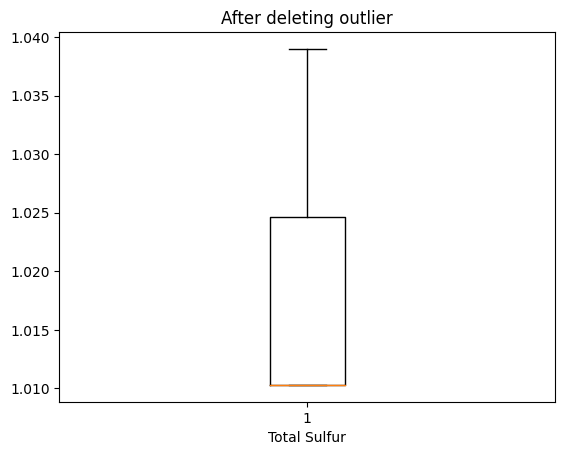

In [63]:
plt.boxplot(afterdel, vert=True)
plt.title("After deleting outlier")
plt.xlabel('Total Sulfur')